# 1.	Uma segmentação dos países dos clientes da AliPaga, por valor de venda, e representatividade dos clusters dentro do faturamento da mesma

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### Trabalhando com os dados

In [42]:
df = pd.read_csv("superstore_dataset2011-2015.csv",encoding = "ISO-8859-1")

In [43]:
dados = df.groupby(['Country'])['Sales', 'Profit'].sum().reset_index()
X = dados[['Sales','Profit']]
X = X.to_numpy()


<ipython-input-43-84bef6c0be66>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dados = df.groupby(['Country'])['Sales', 'Profit'].sum().reset_index()


In [44]:
dados.describe()

,Sales,Profit
count,1.470000e+02,147.000000
mean,8.600341e+04,9982.702662
std,2.413625e+05,37308.047966
min,1.505100e+02,-98447.232000
25%,4.012650e+03,96.540000
50%,1.425405e+04,1558.110000
75%,6.636418e+04,7685.300360
max,2.297201e+06,286397.021700


### 1º Modelo: KMeans

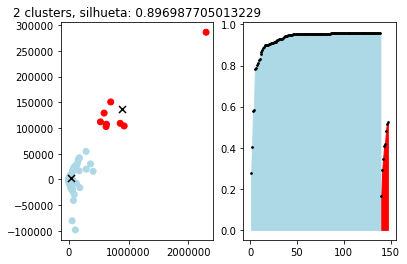

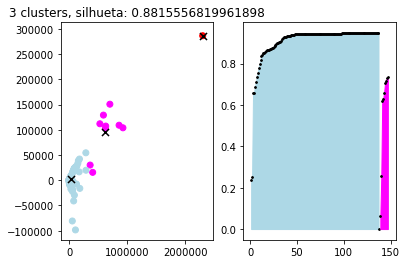

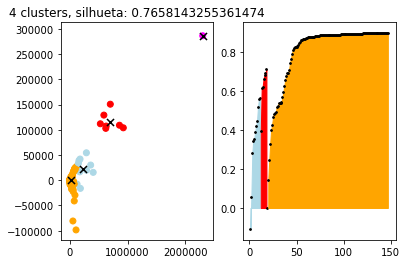

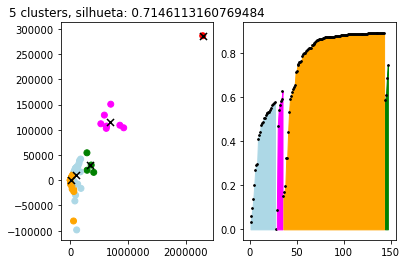

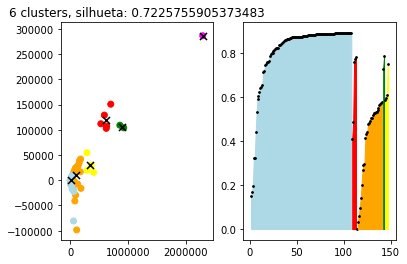

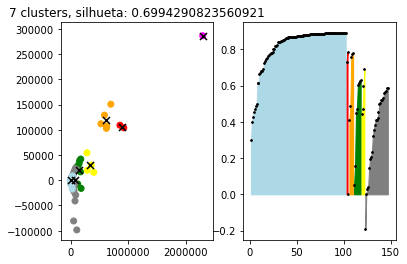

In [45]:
inertia = []

clrs = ['lightblue', 'red', 'magenta', 'orange', 'green','yellow','grey', 'black']

# Analisando o número de clusters
for nc in range(2, 8):
    
    cmap = colors.ListedColormap(clrs[0:nc])
    
    # instanciando o modelo e prefendo a variável resposta
    clst = KMeans(n_clusters=nc, init='k-means++', n_init=10)
    y = clst.fit_predict(X)
    
    # principal métrica
    inertia.append((nc,clst.inertia_,))
    
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.scatter(clst.cluster_centers_[:,0], clst.cluster_centers_[:,1], c='black', marker='x', s=50)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    
    for j in range(0, clst.n_clusters):
        
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        
        xs = xs + len(sil_vc)

#### Além de avaliar graficamente os clusters podemos utilizar a inércia para escolher o número de clusters.

Text(0, 0.5, 'Inércia total')

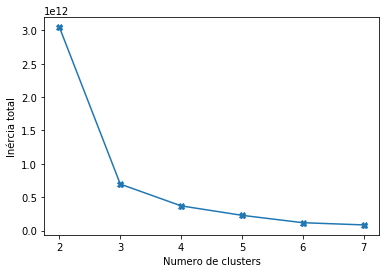

In [46]:
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")
plt.xticks([w[0] for w in inertia])
plt.xlabel("Numero de clusters")
plt.ylabel("Inércia total")

#### Após algumas avaliações dos clusters e considerando o gráfico acima foi tomada a decisão de seguir a análise com 4 clusters.

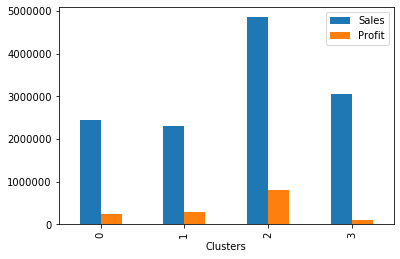

In [47]:
clst = KMeans(n_clusters = 4, init='k-means++', n_init=10)

y = clst.fit_predict(X)
dados["Clusters"] = y
dados.groupby("Clusters").aggregate("sum").plot.bar()

In [64]:
# Vendas e Lucro agrupados pelos clusters encontrados 
resultado = dados.groupby("Clusters").aggregate("sum")

In [ ]:
# Gráfico de rosca do lucro de cada cluster
resultado.Sales.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.title('Vendas por Cluster')

In [ ]:
# Gráfico de rosca das vendas dos clusters
resultado.Profit.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.title('Lucro por Cluster')

### 2° Modelo: Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

clrs = ['lightblue', 'red', 'magenta', 'orange', 'green','grey','yellow']

# Análogo ao modelo anterior
for nc in range(2, 8):
    
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = AgglomerativeClustering(n_clusters=nc)
    y = clst.fit_predict(X)
    
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

A encolha de 4 clusters conntinuou sendo a melhor opção.

In [ ]:
clst = AgglomerativeClustering(n_clusters=4)
y2 = clst.fit_predict(X)

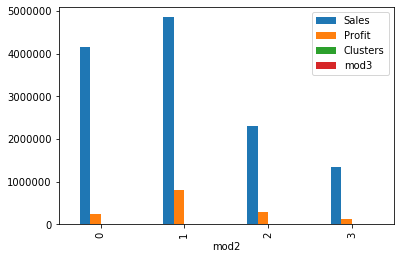

In [61]:
dados["mod2"] = y2
dados.groupby("mod2").aggregate("sum").plot.bar()

In [62]:
resultado2 = dados.groupby("mod2").aggregate("sum")
paises =  dados.groupby("mod2").aggregate("count")

Text(0.5, 1.0, 'Vendas por Cluster')

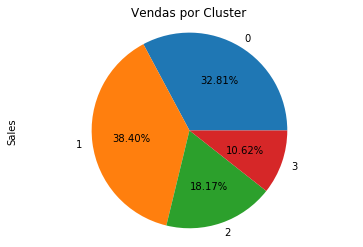

In [63]:
# Vendas por cluster
resultado2.Sales.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Vendas por Cluster')

Text(0.5, 1.0, ' Lucro em cada Cluster')

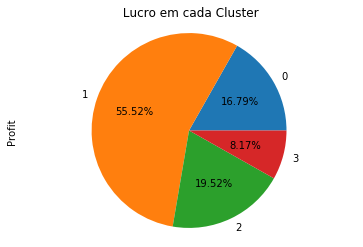

In [51]:
resultado2.Profit.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  
plt.title(" Lucro em cada Cluster")

Text(0.5, 1.0, ' Países em cada Cluster')

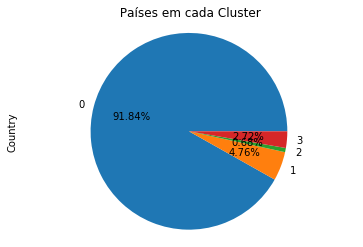

In [52]:
paises.Country.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  
plt.title(" Países em cada Cluster")

### 3° Modelo: MeanShift

In [53]:
from sklearn.cluster import MeanShift 

Nesse modelo não é necessario passar o número de clusters pois ele mesmo encontra

In [54]:
ms = MeanShift() 
y3 = ms.fit_predict(X)

Pela figura podemos ver que Mean Shift encontrou 6 clusters.

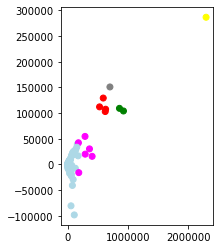

In [55]:
plt.figure()
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=y3, cmap=cmap)

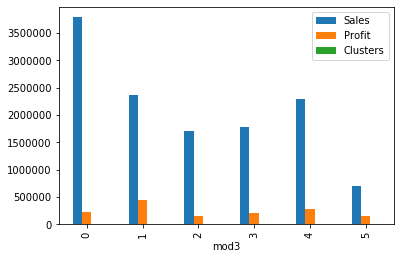

In [56]:
dados["mod3"] = y3
dados.groupby("mod3").aggregate("sum").plot.bar()

In [57]:
resultado3 = dados.groupby("mod3").aggregate("sum")
paises3 =  dados.groupby("mod3").aggregate("count")

Text(0.5, 1.0, 'Vendas por Cluster')

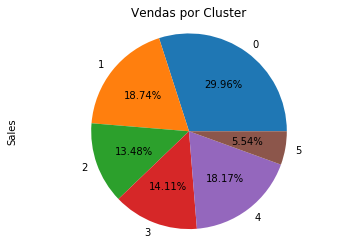

In [58]:
resultado3.Sales.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Vendas por Cluster')

Text(0.5, 1.0, 'Lucro por Cluster')

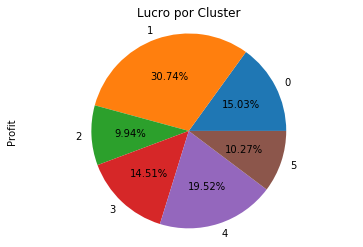

In [59]:
resultado3.Profit.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Lucro por Cluster')

Text(0.5, 1.0, 'Países por Cluster')

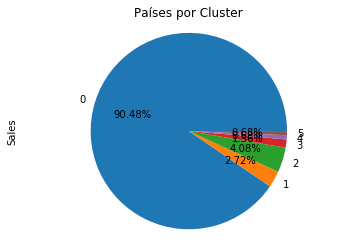

In [60]:
#distribuição dos países, gráfico de rosca

paises3.Sales.plot(kind='pie', autopct='%.2f%%')
plt.axis('equal') 
plt.title('Países por Cluster')

## Conclusão


Ápos uma comparação da composição de cada cluster em cada modelo levando em consideração principalmente a coerência dos países em relação ao lucro e as vendas, podemos dizer que o modelo Aglomerativo teve o melhor desempenho ao classificar os clusters.